In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.applications import mobilenet

train_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Train"
test_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Test"
val_data_dir = r"/content/drive/MyDrive/normalveriseti/BDMediLeaves Dataset Original - TrainValTest/Validation"

datagen = ImageDataGenerator(
preprocessing_function=mobilenet.preprocess_input
)


train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'  
)

validation_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training' 
)

test_gen = ImageDataGenerator(
    preprocessing_function=mobilenet.preprocess_input,
    rotation_range=32,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

test_generator = test_gen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)


Found 1440 images belonging to 10 classes.
Found 406 images belonging to 10 classes.
Found 202 images belonging to 10 classes.


In [17]:
from tensorflow.keras.applications import VGG19  

VGG_ = VGG19(
    input_shape=(256, 256, 3),
    include_top=False,
    weights="imagenet",
    pooling='avg'
)

VGG_.trainable = False


from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy


x = Dense(256, activation='relu')(VGG_.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)

outputs = Dense(10, activation='softmax')(x)

VGG = Model(inputs=VGG_.inputs, outputs=outputs)

VGG.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()]
)



results = VGG.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 30
)

VGG.save('/content/drive/Shareddrives/yeni derin öğrenme ortak drive/VGG16DÜZVERİSETİ.h5')

Epoch 1/30
45/45 [==============================] - 638s 14s/step - loss: 1.9858 - categorical_accuracy: 0.3264 - val_loss: 1.4990 - val_categorical_accuracy: 0.5320
Epoch 2/30
45/45 [==============================] - 146s 3s/step - loss: 1.2421 - categorical_accuracy: 0.6278 - val_loss: 0.9118 - val_categorical_accuracy: 0.7857
Epoch 3/30
45/45 [==============================] - 161s 4s/step - loss: 0.8531 - categorical_accuracy: 0.7264 - val_loss: 0.6568 - val_categorical_accuracy: 0.8054
Epoch 4/30
45/45 [==============================] - 166s 4s/step - loss: 0.6350 - categorical_accuracy: 0.7972 - val_loss: 0.4955 - val_categorical_accuracy: 0.8744
Epoch 5/30
45/45 [==============================] - 147s 3s/step - loss: 0.5009 - categorical_accuracy: 0.8431 - val_loss: 0.4212 - val_categorical_accuracy: 0.8695
Epoch 6/30
45/45 [==============================] - 138s 3s/step - loss: 0.4057 - categorical_accuracy: 0.8722 - val_loss: 0.3508 - val_categorical_accuracy: 0.9064
Epoch 7/3

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/Shareddrives/yeni derin öğrenme ortak drive/VGG16DÜZVERİSETİ.h5'  
loaded_model = load_model(model_path)


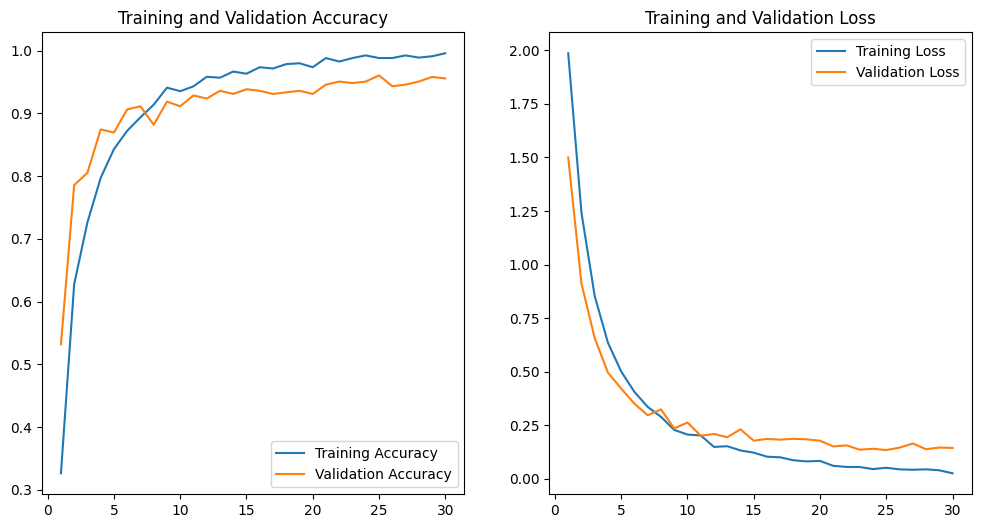

In [24]:
import matplotlib.pyplot as plt

epoch_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'loss': [1.9858, 1.2421, 0.8531, 0.6350, 0.5009, 0.4057, 0.3360, 0.2899, 0.2286, 0.2070, 0.2027, 0.1493, 0.1525, 0.1328, 0.1226, 0.1036, 0.1007, 0.0870, 0.0817, 0.0839, 0.0612, 0.0558, 0.0555, 0.0458, 0.0519, 0.0446, 0.0427, 0.0447, 0.0402, 0.0263],
    'accuracy': [0.3264, 0.6278, 0.7264, 0.7972, 0.8431, 0.8722, 0.8938, 0.9139, 0.9410, 0.9354, 0.9431, 0.9583, 0.9569, 0.9667, 0.9632, 0.9736, 0.9715, 0.9785, 0.9799, 0.9736, 0.9882, 0.9826, 0.9882, 0.9924, 0.9882, 0.9882, 0.9924, 0.9889, 0.9910, 0.9958],
    'val_loss': [1.4990, 0.9118, 0.6568, 0.4955, 0.4212, 0.3508, 0.2969, 0.3243, 0.2358, 0.2633, 0.2017, 0.2096, 0.1945, 0.2312, 0.1782, 0.1865, 0.1832, 0.1871, 0.1846, 0.1781, 0.1515, 0.1564, 0.1364, 0.1406, 0.1346, 0.1458, 0.1653, 0.1387, 0.1463, 0.1445],
    'val_accuracy': [0.5320, 0.7857, 0.8054, 0.8744, 0.8695, 0.9064, 0.9113, 0.8818, 0.9187, 0.9113, 0.9286, 0.9236, 0.9360, 0.9310, 0.9384, 0.9360, 0.9310, 0.9335, 0.9360, 0.9310, 0.9458, 0.9507, 0.9483, 0.9507, 0.9606, 0.9433, 0.9458, 0.9507, 0.9581, 0.9557]
}

epochs_range = epoch_data['epoch']
acc = epoch_data['accuracy']
val_acc = epoch_data['val_accuracy']
loss = epoch_data['loss']
val_loss = epoch_data['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


7/7 [==============================] - 86s 14s/step - loss: 0.7357 - categorical_accuracy: 0.7921
Test accuracy: 0.7920792102813721
7/7 [==============================] - 21s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       1.00      0.76      0.86        21
           2       0.78      0.90      0.84        20
           3       0.94      0.81      0.87        21
           4       0.86      0.90      0.88        20
           5       0.81      0.91      0.86        23
           6       0.86      0.57      0.69        21
           7       0.85      0.73      0.79        15
           8       0.74      1.00      0.85        20
           9       0.80      0.76      0.78        21

    accuracy                           0.83       202
   macro avg       0.84      0.83      0.82       202
weighted avg       0.84      0.83      0.82       202

Overall Precision: 0.84
Overall Rec

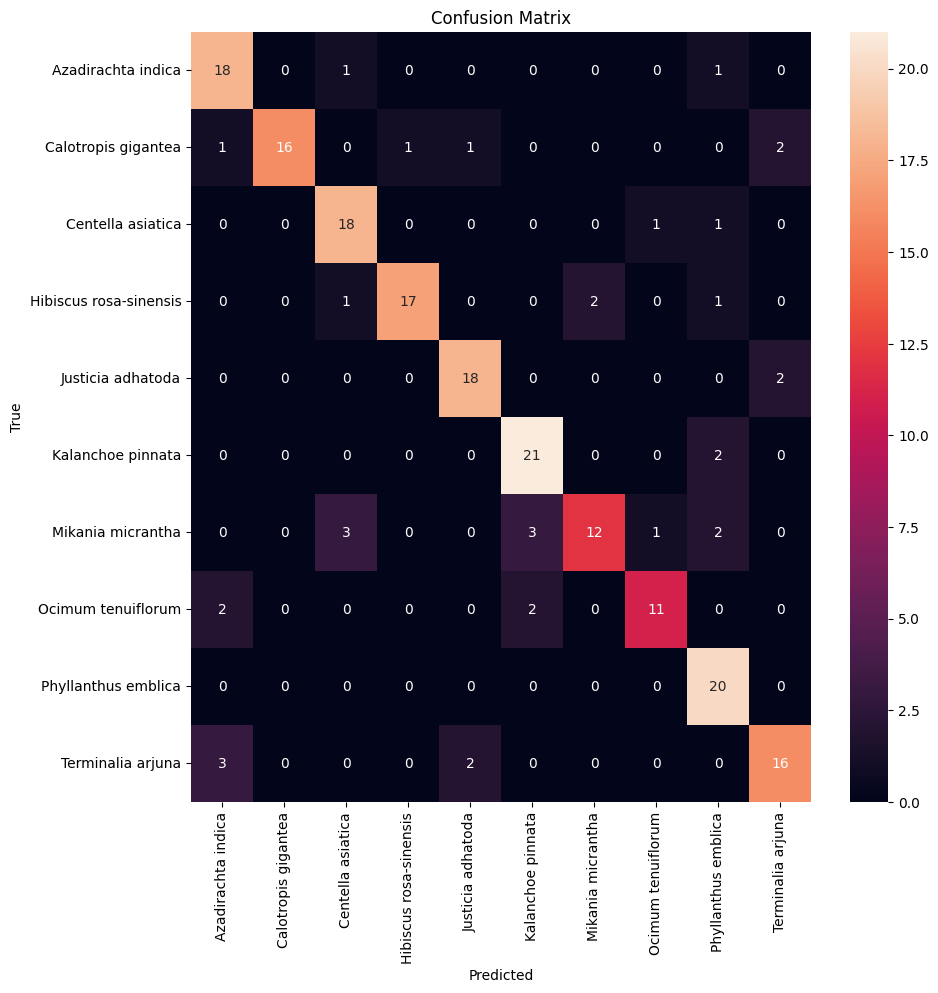

In [23]:

test_loss, test_acc = loaded_model.evaluate(test_generator)
print('Test accuracy:', test_acc)


y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')


print('Classification Report:')
print(classification_report(y_true, y_pred_classes))


print(f'Overall Precision: {precision:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall F1-score: {f1:.2f}')


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()